In [44]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [58]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn.metrics import r2_score, mean_squared_error

# Load the customer data into a Pandas DataFrame
data = pd.read_csv('Telco-Customer-Churn1200 - WA_Fn-UseC_-Telco-Customer-Churn.csv.csv')

# Define the dependent and independent variables
X = data[['Contract', 'MonthlyCharges', 'TotalCharges', 'CustomerRating']]
y = data['Churn']

In [59]:
# See subset of values
data.head()

,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,CustomerRating,MonthlyCharges,TotalCharges,Churn
0,759122-VHVEG,Female,122,1,0,1,0,0 phone service,DSL,0,...,0,0,0,0,3,1,3,29.85,29.85,0
1,5575-GNVDE,Male,122,0,0,34,1,0,DSL,1,...,1,0,0,0,12,0,4,56.95,1889.50,0
2,3668-QPYBK,Male,122,0,0,2,1,0,DSL,1,...,0,0,0,0,3,1,4,53.85,11228.15,1
3,7795-CFOCW,Male,122,0,0,45,0,0 phone service,DSL,1,...,1,1,0,0,12,0,5,42.30,184122.75,0
4,9237-HQITU,Female,122,0,0,2,1,0,Fiber optic,0,...,0,0,0,0,3,1,3,7122.70,151.65,1


In [60]:
# Split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [61]:
# Drop rows with NaN values
X_train = X_train.dropna()
y_train = y_train.loc[X_train.index]

In [62]:
# Create and fit the linear regression model
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [63]:
# Drop rows with NaN values
X_test = X_test.dropna()
y_test = y_test.loc[X_test.index]

In [64]:
# Predict customer churn for the test set
y_pred = model.predict(X_test)

In [65]:
# Evaluate model performance
r2 = r2_score(y_test, y_pred)
mse = mean_squared_error(y_test, y_pred)
print('R-squared:', r2)
print('Mean Squared Error:', mse)

R-squared: 0.16076971758158942
Mean Squared Error: 0.16342745526730348


In [66]:
# Analyze the regression coefficients
print('Regression Coefficients:')
print(model.coef_)

Regression Coefficients:
[-1.96265896e-02  9.99477938e-08  5.56654648e-12 -2.16781097e-02]


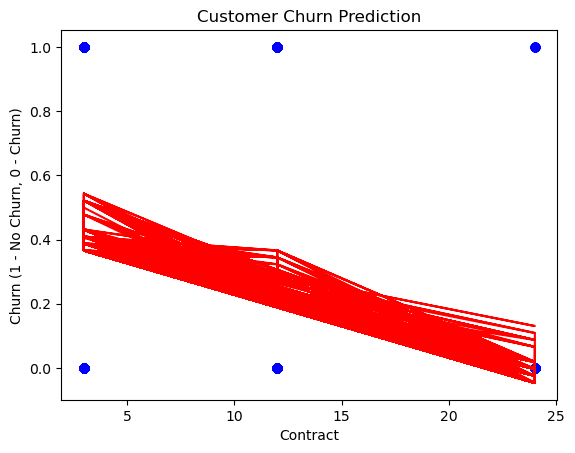

In [67]:
# Plot the regression line and scatter points
plt.scatter(X_train['Contract'], y_train, color='blue')
plt.plot(X_train['Contract'], model.predict(X_train), color='red')
plt.xlabel('Contract')
plt.ylabel('Churn (1 - No Churn, 0 - Churn)')
plt.title('Customer Churn Prediction')
plt.show()

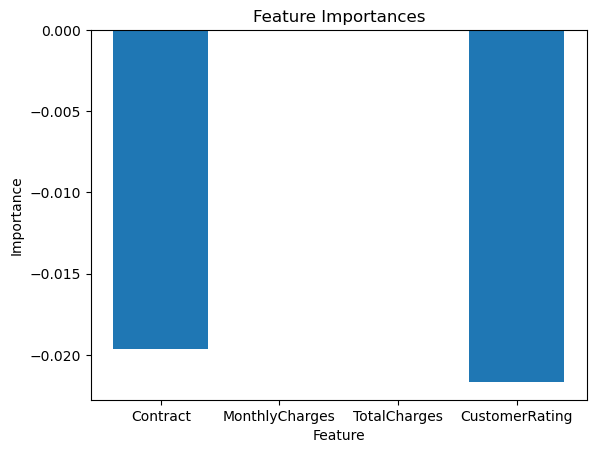

In [68]:
# Plot the feature importances
importances = model.coef_
feature_names = X.columns
plt.bar(feature_names, importances)
plt.xlabel('Feature')
plt.ylabel('Importance')
plt.title('Feature Importances')
plt.show()

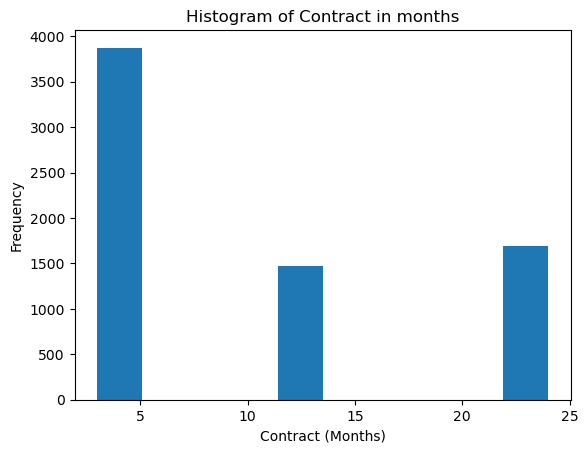

In [69]:
#Histogram of Contract
plt.hist(data['Contract'])
plt.xlabel('Contract (Months)')
plt.ylabel('Frequency')
plt.title('Histogram of Contract in months')
plt.show()

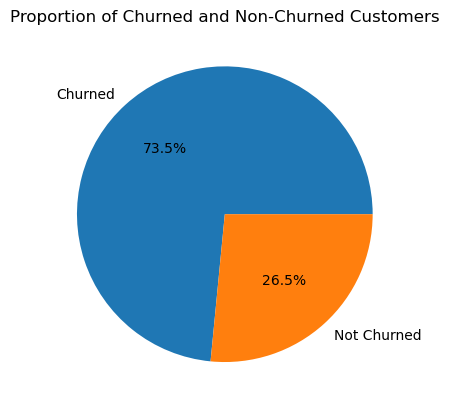

In [70]:
# Create a pie chart showing the proportion of churned and non-churned customers
churn_counts = data['Churn'].value_counts()
churn_labels = ['Churned', 'Not Churned']
plt.pie(churn_counts, labels=churn_labels, autopct="%1.1f%%")
plt.title('Proportion of Churned and Non-Churned Customers')
plt.show()